<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week14_Pr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색
- 훈련 세트

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
#각 레이블은 0과 9 사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 데이터 탐색
- 테스트 세트

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

### 데이터 전처리
- 값을 255로 나누어 범위를 0과 1 사이로 조정

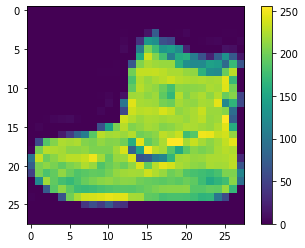

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

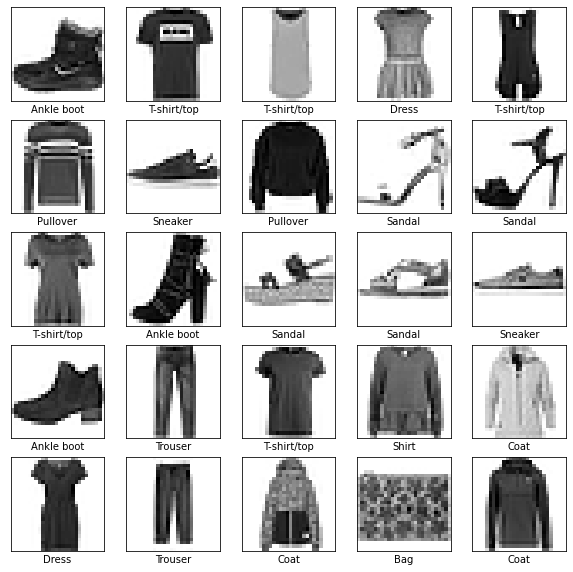

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
### 층 설정
- 간단한 층을 연결하여 구성한다.
- 첫번째 층인 `tf.keras.layers.Flatten`은 2차원 배열의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 반환한다. 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.
- 픽셀을 펼친 후에는 두개의 `tf.keras.layers.Dense`가 연속되어 연결된다. 첫번째는 128개의 노드를 가지고, 두번째는 10개의 노드를 갖는 소프트맥스 층이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 모델 컴파일

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 학습
- `fit` 메서드로 모델을 학습시킨다.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4968 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2578 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2467 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

### 정확도 평가

In [ ]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy: ", test_acc)

313/313 - 1s - loss: 0.3317 - accuracy: 0.8828 - 630ms/epoch - 2ms/step

Test Accuracy:  0.8827999830245972


### 예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행한다. 모델의 선형 출력, 로짓, 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환한다.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 0s 944us/step


In [ ]:
predictions[0]

array([3.4683173e-05, 9.1043093e-09, 1.1891074e-08, 2.5002585e-11,
       2.5823699e-09, 1.6898717e-03, 3.6236864e-07, 4.5486009e-03,
       2.4396775e-07, 9.9372619e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

### 예측하기
- 10개 클래스에 대한 예측을 모두 그래프로 표현

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),class_names[true_label]), color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행한다,
- 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색이다.
- 숫자는 예측 레이블의 신뢰도 퍼센트이다.

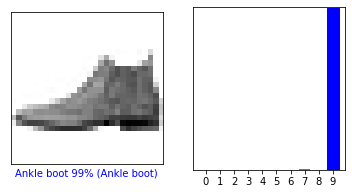

In [ ]:
#0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

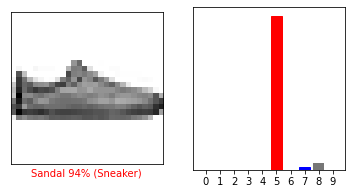

In [ ]:
#12번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

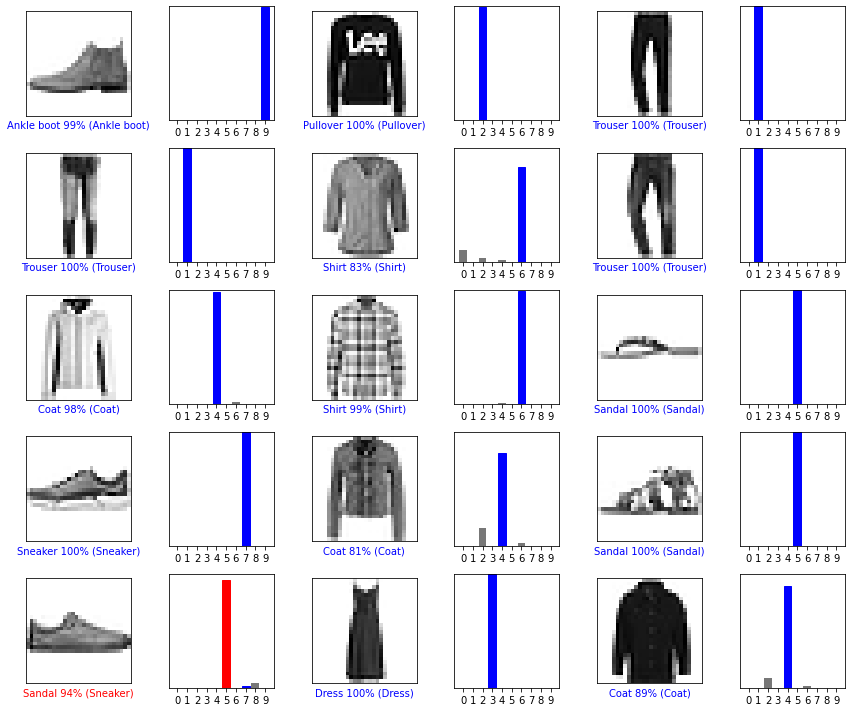

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 훈련된 모델 사용하기
- 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.
- `tf.keras` 모델은 한번에 샘플의 묶음 또는 배치로 예측을 만드는데 최적화되어 있으므로, 하나의 이미지를 사용할 때도 2차원 배열로 만들어야 한다.

In [ ]:
img=test_images[1]
print(img.shape)

(28, 28)


In [ ]:
img=(np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single=probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[1.5656311e-05 2.2810748e-11 9.9727494e-01 9.3380024e-13 2.4911931e-03
  2.5448771e-12 2.1828651e-04 4.2650315e-15 2.9851904e-10 7.3499079e-13]]


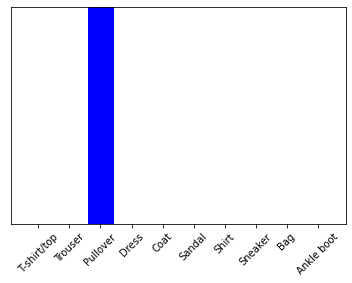

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_=plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2